In [2]:
import numpy as np

benchmark_file_name = 'benchpress/.benchmarks/Linux-CPython-3.12-64bit/0001_qiskit_24062024.json'

# Import the benchmark data
import json
with open(benchmark_file_name) as f:
    data = json.load(f)

#Get benchmarks
benchmarks = data['benchmarks']

benchmark_data = {}

#Within benchmarks, iterate over each benchmark
for benchmark in benchmarks:
    #Get the group and name of the benchmark
    group = benchmark['group']
    name = benchmark['name']

    #Get the min, max and mean of the benchmark
    min_time = benchmark['stats']['min']
    max_time = benchmark['stats']['max']
    mean_time = benchmark['stats']['mean']

    #Store the data in a dictionary
    if group not in benchmark_data:
        benchmark_data[group] = {}
    benchmark_data[group][name] = {'min': min_time, 'max': max_time, 'mean': mean_time}

/tmp/ipykernel_5601/1389583563.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=45, ha='right')


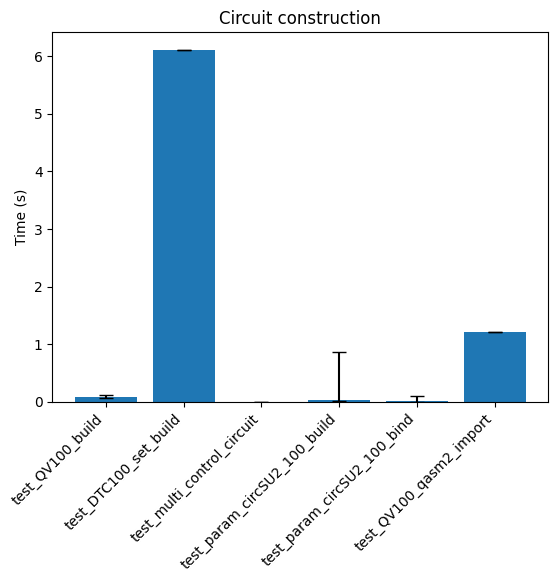

/tmp/ipykernel_5601/1389583563.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=45, ha='right')


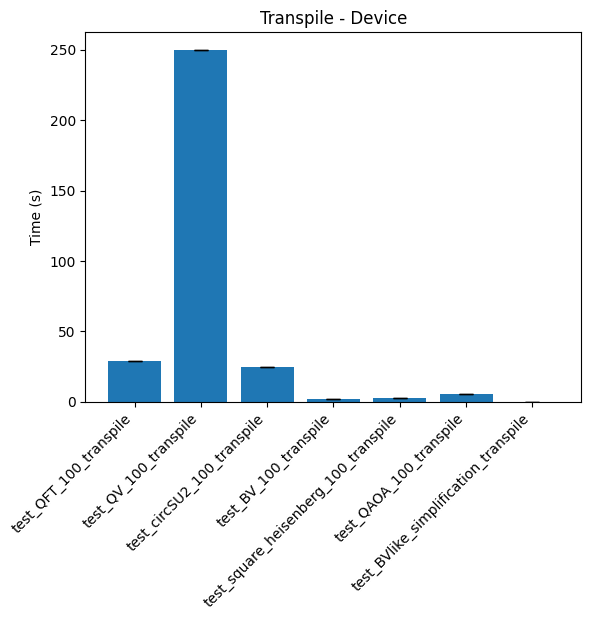

/tmp/ipykernel_5601/1389583563.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names, rotation=45, ha='right')


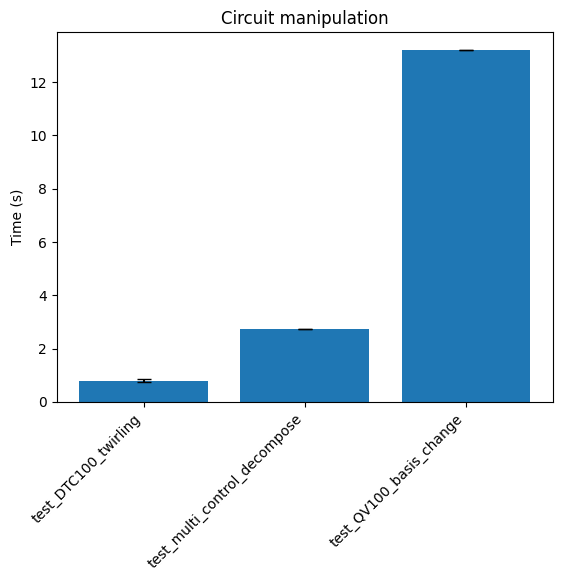

In [11]:
#Plot the data as a bar chart, with a different chart for every group. The different names are different bars in the same chart. The bars have upper and lower error bars 
# corresponding to the difference between max and min and the mean times respectively which are asymmetric. The mean time is the height of the bar.
# The x-axis is the name of the benchmark, and the y-axis is the time in seconds. Make the x-axis labels slanted for better readability.
# The title of the chart is the group of the benchmark.
import matplotlib.pyplot as plt

for group in benchmark_data:
    names = list(benchmark_data[group].keys())    
    mins = [benchmark_data[group][name]['mean'] - benchmark_data[group][name]['min'] for name in names]
    maxs = [benchmark_data[group][name]['max'] - benchmark_data[group][name]['mean'] for name in names]
    means = [benchmark_data[group][name]['mean'] for name in names]

    fig, ax = plt.subplots()
    ax.bar(names, means, yerr=[mins, maxs], capsize=5)
    ax.set_ylabel('Time (s)')
    ax.set_title(group)
    ax.set_xticklabels(names, rotation=45, ha='right')

    plt.show()
    